In [1]:
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/nslkdd/KDDTrain+.txt", header=None)

In [3]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21


In [4]:
for col in df.columns:
    print(f"Coluna {col}:")
    print(df[col].head())
    print("\n")

Coluna 0:
0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64


Coluna 1:
0    tcp
1    udp
2    tcp
3    tcp
4    tcp
Name: 1, dtype: object


Coluna 2:
0    ftp_data
1       other
2     private
3        http
4        http
Name: 2, dtype: object


Coluna 3:
0    SF
1    SF
2    S0
3    SF
4    SF
Name: 3, dtype: object


Coluna 4:
0    491
1    146
2      0
3    232
4    199
Name: 4, dtype: int64


Coluna 5:
0       0
1       0
2       0
3    8153
4     420
Name: 5, dtype: int64


Coluna 6:
0    0
1    0
2    0
3    0
4    0
Name: 6, dtype: int64


Coluna 7:
0    0
1    0
2    0
3    0
4    0
Name: 7, dtype: int64


Coluna 8:
0    0
1    0
2    0
3    0
4    0
Name: 8, dtype: int64


Coluna 9:
0    0
1    0
2    0
3    0
4    0
Name: 9, dtype: int64


Coluna 10:
0    0
1    0
2    0
3    0
4    0
Name: 10, dtype: int64


Coluna 11:
0    0
1    0
2    0
3    1
4    1
Name: 11, dtype: int64


Coluna 12:
0    0
1    0
2    0
3    0
4    0
Name: 12, dtype: int64


Coluna 13:
0    0
1

In [5]:
df.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
# use as many code and text cells as needed
def numer_of_instances(df):
    return len(df)
def numer_of_features(df):
    return len(df.columns)
def total_of_classes(df):
    for col in df.columns:
        uniques = df[col].unique()
        print(f' --- \n {col}: number of classes: {len(uniques)} -> {uniques} ')

def class_distribution(df):
    results = {}
    for col in df.columns:
        results[col] = dict(df[col].value_counts())
    return results

In [7]:
total_of_classes(df)

 --- 
 0: number of classes: 2981 -> [    0  5607   507 ...  5430 11680   679] 
 --- 
 1: number of classes: 3 -> ['tcp' 'udp' 'icmp'] 
 --- 
 2: number of classes: 70 -> ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 
 --- 
 3: number of classes: 11 -> ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 
 --- 
 4: number of classes: 3341 -> [  491   146     0 ...  2816 11466  2358] 
 --- 
 5: number of class

In [21]:
def distribution_grid_plot(data_dict, cols=3, figsize=(15, 30)):
    total = len(data_dict)
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # transforma matriz 2D em lista pra facilitar o loop

    for idx, (class_name, values) in enumerate(data_dict.items()):
        counts = Counter(values)
        keys = list(counts.keys())
        freq = list(counts.values())

        ax = axes[idx]
        ax.bar(keys, freq, color='mediumseagreen')
        ax.set_title(class_name)
        ax.set_xlabel('Valor')
        ax.set_ylabel('Frequência')
        ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Remove eixos vazios (caso o número de gráficos não preencha toda a grade)
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()

In [8]:
distribution = class_distribution(df)
distribution

{0: {0: np.int64(115955),
  1: np.int64(1989),
  2: np.int64(843),
  3: np.int64(557),
  4: np.int64(351),
  5: np.int64(298),
  27: np.int64(197),
  6: np.int64(193),
  28: np.int64(181),
  7: np.int64(127),
  10: np.int64(124),
  8: np.int64(98),
  12: np.int64(96),
  9: np.int64(95),
  30: np.int64(82),
  23: np.int64(82),
  15: np.int64(81),
  11: np.int64(78),
  31: np.int64(76),
  29: np.int64(70),
  21: np.int64(70),
  20: np.int64(68),
  22: np.int64(66),
  25: np.int64(64),
  26: np.int64(57),
  14: np.int64(54),
  13: np.int64(53),
  24: np.int64(50),
  16: np.int64(45),
  32: np.int64(38),
  17: np.int64(35),
  19: np.int64(32),
  18: np.int64(27),
  33: np.int64(24),
  36: np.int64(19),
  40: np.int64(18),
  37: np.int64(18),
  35: np.int64(17),
  38: np.int64(14),
  34: np.int64(14),
  2630: np.int64(14),
  39: np.int64(14),
  45: np.int64(11),
  60: np.int64(10),
  63: np.int64(10),
  2620: np.int64(8),
  5051: np.int64(8),
  43: np.int64(7),
  46: np.int64(7),
  42: np.i

In [9]:
def resumo_estatistico(valores):
    valores = np.array(valores)
    media = np.mean(valores)
    desvio = np.std(valores)
    return media, desvio

def detectar_distribuicao(valores):
    valores = np.array(valores)
    skewness = skew(valores)
    kurt = kurtosis(valores)

    if abs(skewness) < 0.5:
        if abs(kurt) < 1:
            return 'Aprox. Normal'
        elif kurt > 1:
            return 'Leptocúrtica'
        else:
            return 'Platicúrtica'
    elif skewness > 0.5:
        return 'Assimetria à direita'
    elif skewness < -0.5:
        return 'Assimetria à esquerda'
    return 'Indefinida'


def calcular_skewness(valores):
    return skew(np.array(valores))

def calcular_kurtosis(valores):
    return kurtosis(np.array(valores))

def plot_class_distributions_grid(data_dict, cols=3, figsize=(5, 5)):
    total = len(data_dict)
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0]*cols, figsize[1]*rows))
    fig.patch.set_facecolor('black')  # fundo da figura

    axes = axes.flatten()

    for idx, (class_name, values) in enumerate(data_dict.items()):
        intvalues = []
        for value in values:
            intvalues.append(values[value])

        counts = Counter(values)
        keys = list(counts.keys())
        freq = list(counts.values())

        media, desvio = resumo_estatistico(intvalues)
        skewness = calcular_skewness(intvalues)
        kurt = calcular_kurtosis(intvalues)
        tipo_dist = detectar_distribuicao(intvalues)

        ax = axes[idx]
        ax.bar(keys, freq, color='blue')  # barras em azul claro

        # Fundo preto pro gráfico
        ax.set_facecolor('black')

        # Linhas de média e std
        ax.axhline(media, color='red', linestyle='--', label='Média')
        ax.axhline(media + desvio, color='orange', linestyle=':', label='+1σ')
        ax.axhline(media - desvio, color='orange', linestyle=':', label='-1σ')

        # Título com fonte branca
        ax.set_title(
            f'{class_name}\n'
            f'Média: {media:.2f}, Std: {desvio:.2f}\n'
            f'Skew: {skewness:.2f}, Kurtosis: {kurt:.2f}\n'
            f'Distribuição: {tipo_dist}',
            fontsize=10,
            color='white'
        )

        # Labels brancos
        ax.set_xlabel('Valor', color='white')
        ax.set_ylabel('Frequência', color='white')

        # Eixos e ticks brancos
        ax.tick_params(colors='white')
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')

        # Grid branco
        ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')
        ax.legend(fontsize=8, facecolor='black', edgecolor='white', labelcolor='white')

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()

    def boxplot_class_distributions_grid(data_dict, cols=3, figsize=(18, 45)):
      total = len(data_dict)
      rows = math.ceil(total / cols)

      fig, axes = plt.subplots(rows, cols, figsize=figsize)
      fig.patch.set_facecolor('black')  # fundo da figura

      axes = axes.flatten()

      for idx, (class_name, values) in enumerate(data_dict.items()):
          intvalues = []
          for value in values:
              intvalues.append(values[value])

          counts = Counter(values)
          keys = list(counts.keys())
          freq = list(counts.values())

          media, desvio = resumo_estatistico(intvalues)
          skewness = calcular_skewness(intvalues)
          kurt = calcular_kurtosis(intvalues)
          tipo_dist = detectar_distribuicao(intvalues)

          sns.boxplot(
                  data=df, y=idx,
                  boxprops={'color': 'blue'},    # Quartis
                  medianprops={'color': 'red'},  # Mediana
                  whiskerprops={'color': 'green'}, capprops={'color': 'green'}  # Extremos
          )

      fig.tight_layout()
      plt.show()


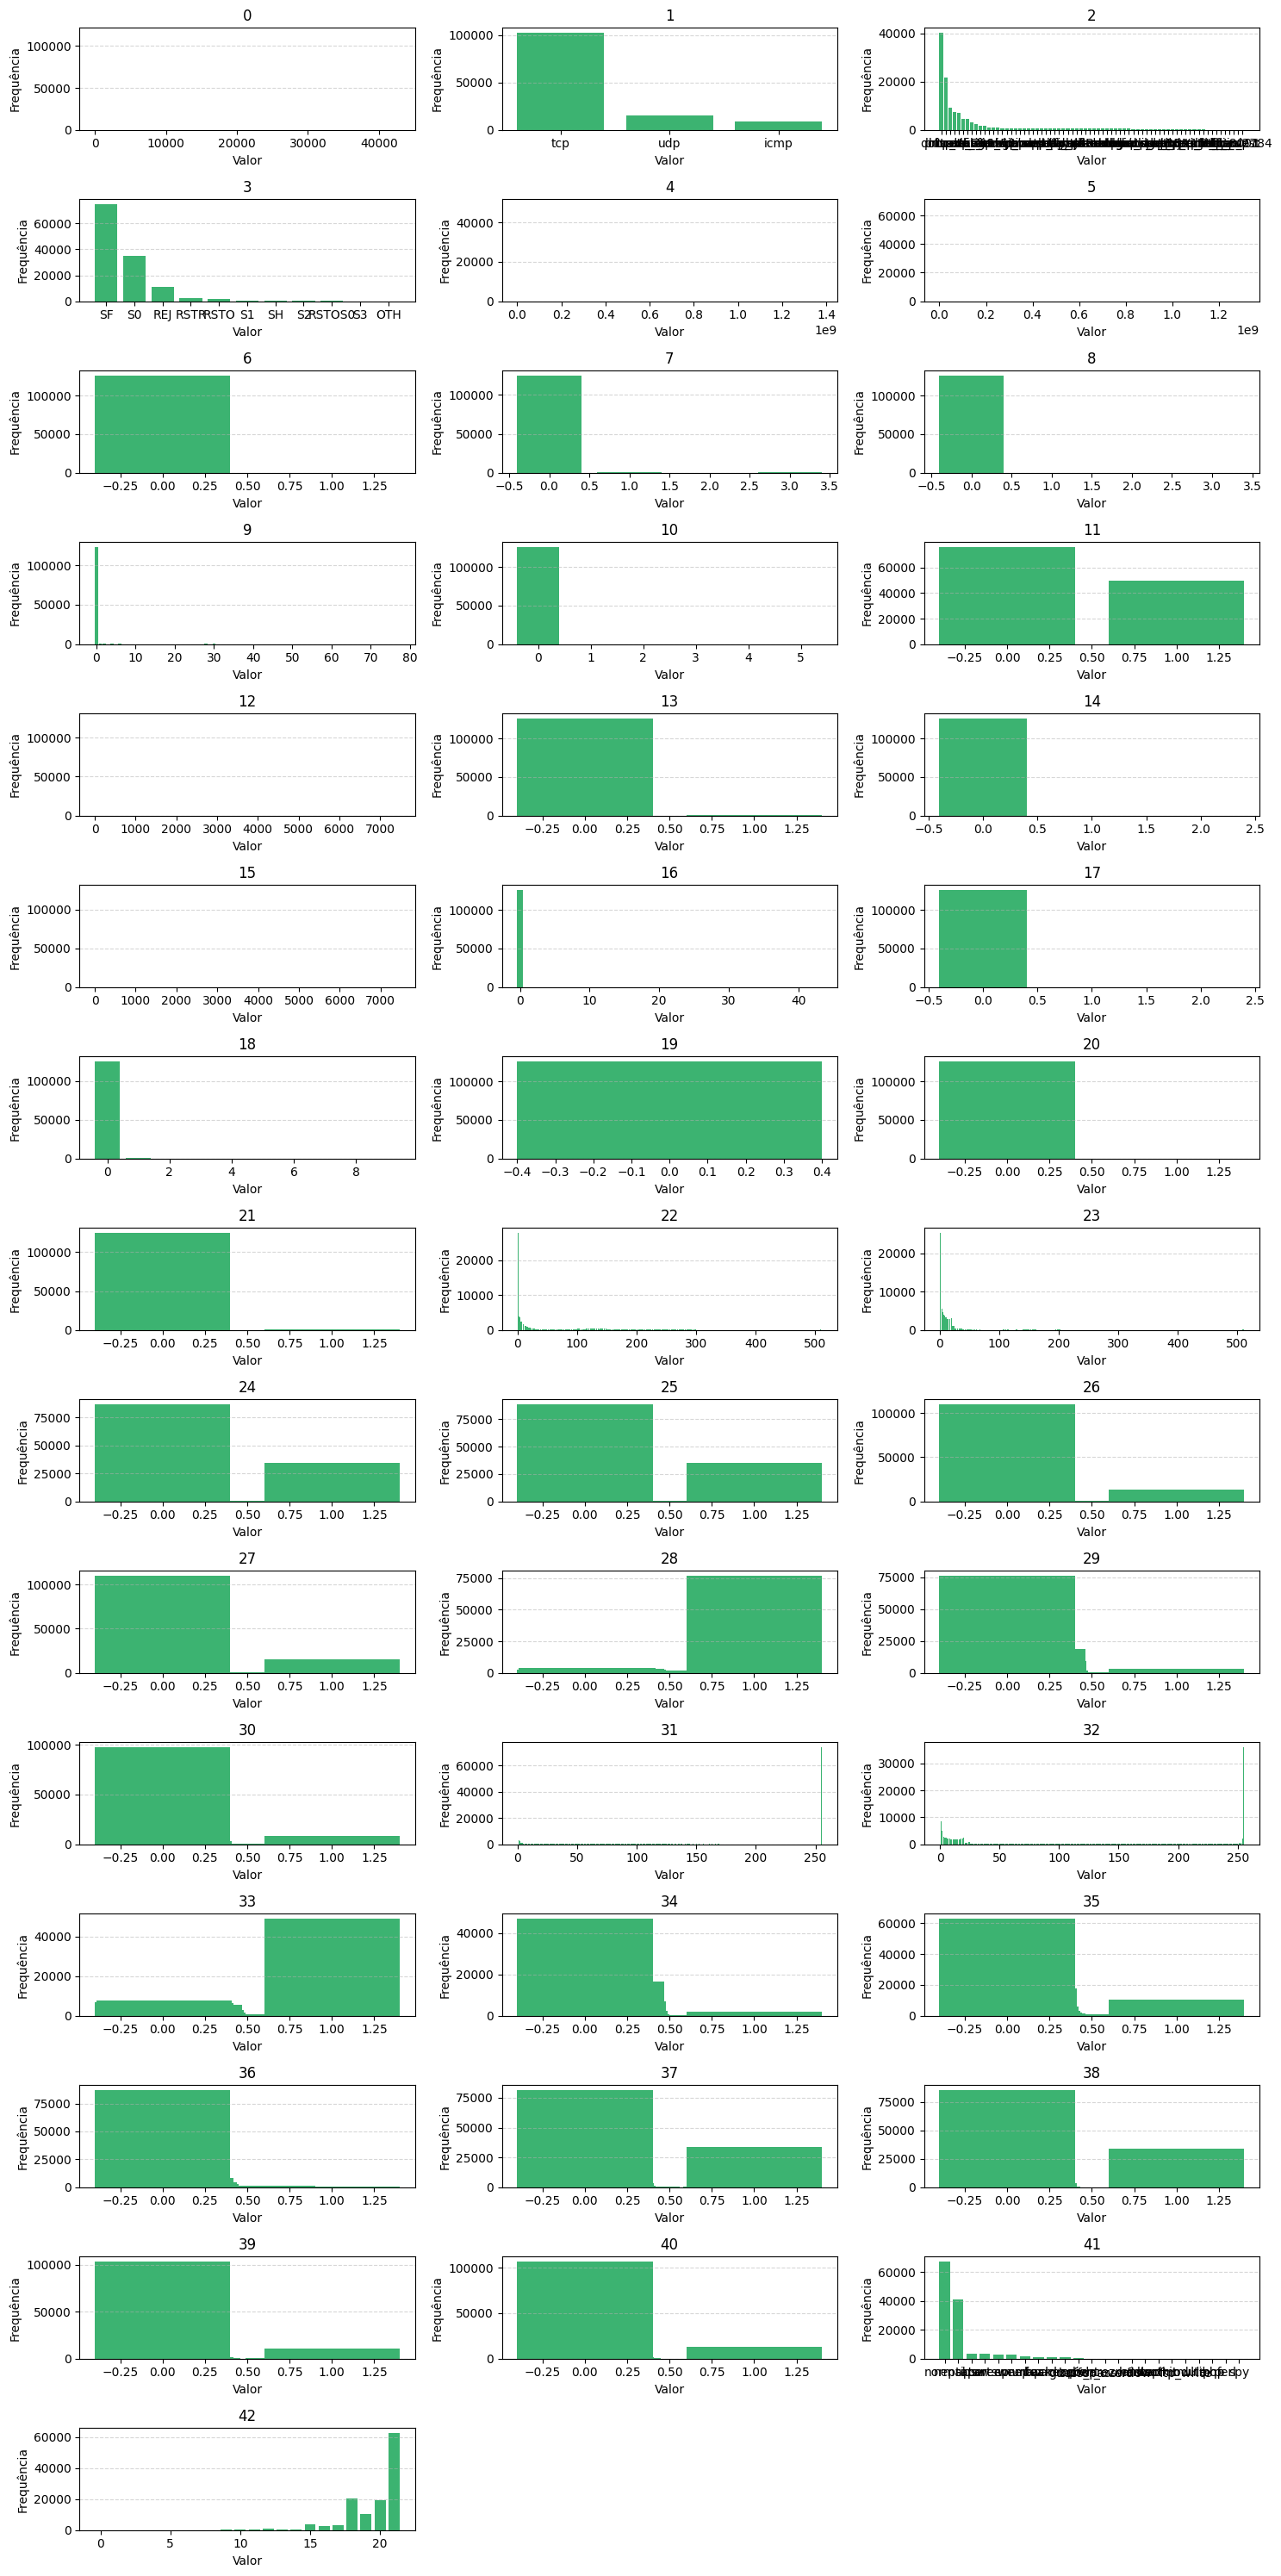

In [23]:
distribution_grid_plot(distribution)

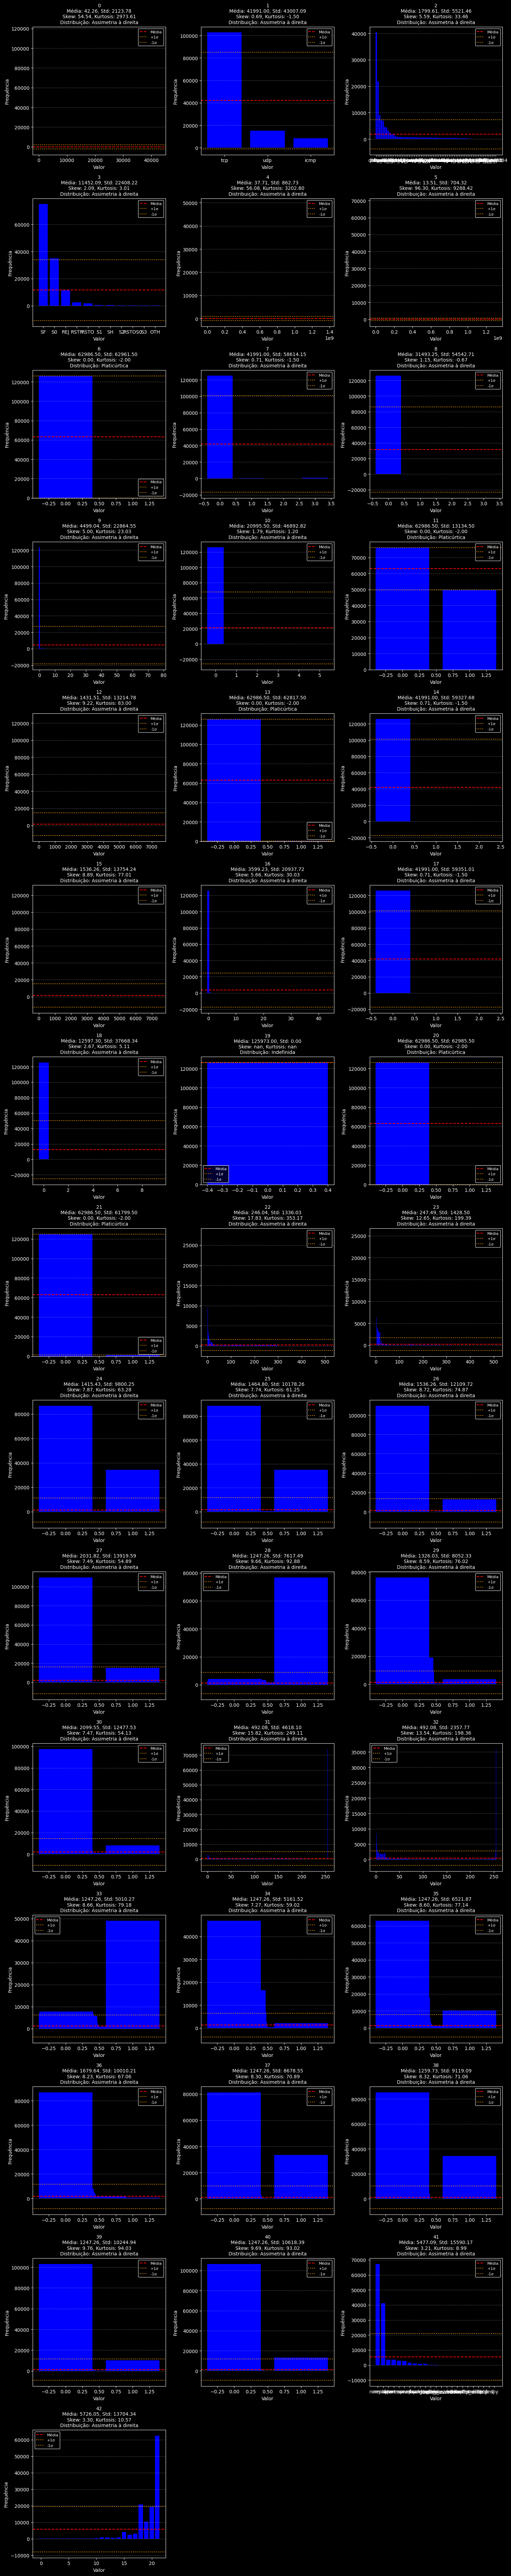

In [31]:
plot_class_distributions_grid(distribution)

In [10]:
def plot_numericas(df, numericas):
    for col in numericas:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        sns.boxplot(data=df, y=col, ax=ax[0])
        ax[0].set_title(f'Boxplot - {col}')

        # Histograma com KDE
        sns.histplot(df[col], kde=True, ax=ax[1])
        ax[1].set_title(f'Distribuição - {col}')

        # Estatísticas
        media = df[col].mean()
        skew = df[col].skew()
        kurt = df[col].kurtosis()
        stats_text = f'Média: {media:.2f}\nSkewness: {skew:.2f}\nKurtosis: {kurt:.2f}'

        # Inserir estatísticas como texto no gráfico de distribuição
        ax[1].text(
            0.95, 0.95, stats_text,
            transform=ax[1].transAxes,
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8)
        )

        plt.tight_layout()
        plt.show()

In [40]:
def top_correlacoes(df, top_n=5, metodo='pearson'):
    # Filtra apenas colunas numéricas
    df_numerico = df.select_dtypes(include=[np.number])

    # Calcula matriz de correlação
    corr = df_numerico.corr(method=metodo)

    # Ignora autocorrelações (diagonal) e pega somente pares únicos
    corr_pairs = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'Var1', 'level_1': 'Var2', 0: 'Correlation'})
    )

    # Remove duplicatas (A,B) e (B,A)
    corr_pairs['Ordered'] = corr_pairs.apply(lambda row: tuple(sorted((row['Var1'], row['Var2']))), axis=1)
    corr_pairs = corr_pairs.drop_duplicates('Ordered').drop(columns='Ordered')

    # Ordena pelas maiores correlações absolutas
    top_corr = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)

    return top_corr.head(top_n)

top_correlacoes(df, 10)

,Var1,Var2,Correlation
344,12,15,0.998833
760,24,25,0.993289
836,26,27,0.989008
810,25,38,0.986252
1254,37,38,0.985052
773,24,38,0.981139
772,24,37,0.979373
809,25,37,0.977596
886,27,40,0.970208
849,26,40,0.964449


In [41]:
top_correlacoes(df, 10, 'spearman')

,Var1,Var2,Correlation
760,24,25,0.973119
836,26,27,0.965777
810,25,38,0.942332
772,24,37,0.935943
773,24,38,0.921663
912,28,29,-0.920431
1254,37,38,0.919490
1064,32,33,0.919323
809,25,37,0.918676
1102,33,34,-0.898954


In [11]:
def separar_colunas(df):
    colunas_categoricas = []
    colunas_numericas = []

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            colunas_numericas.append(col)
        else:
            colunas_categoricas.append(col)
    
    return colunas_categoricas, colunas_numericas

In [12]:
colunas_categoricas, colunas_numericas = separar_colunas(df)

In [23]:
colunas_numericas

[0,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42]

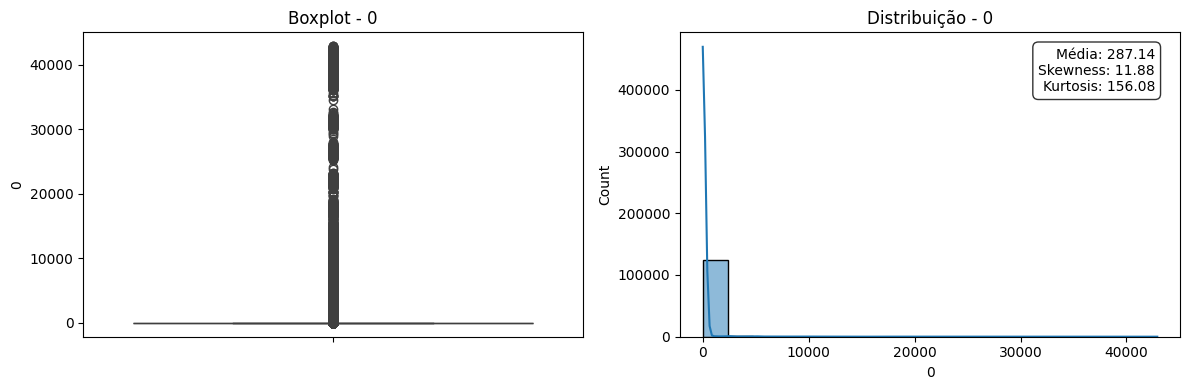

In [ ]:
plot_numericas(df, colunas_numericas)